In [29]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline


## Task 1: Data Acquisition and Preparation

In [ ]:
df = pd.read_csv("data/Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [4]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [5]:
df.duplicated().sum()

np.int64(0)

In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

<Axes: >

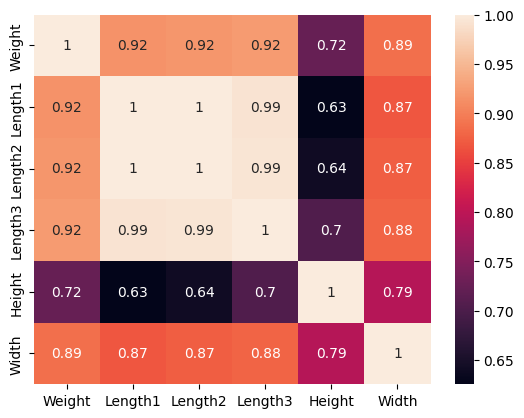

In [9]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [10]:
df = pd.get_dummies(df, drop_first=True)
df

,Weight,Length1,Length2,Length3,Height,Width,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,False,False,False,False,False,False
1,290.0,24.0,26.3,31.2,12.4800,4.3056,False,False,False,False,False,False
2,340.0,23.9,26.5,31.1,12.3778,4.6961,False,False,False,False,False,False
3,363.0,26.3,29.0,33.5,12.7300,4.4555,False,False,False,False,False,False
4,430.0,26.5,29.0,34.0,12.4440,5.1340,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
154,12.2,11.5,12.2,13.4,2.0904,1.3936,False,False,False,False,True,False
155,13.4,11.7,12.4,13.5,2.4300,1.2690,False,False,False,False,True,False
156,12.2,12.1,13.0,13.8,2.2770,1.2558,False,False,False,False,True,False
157,19.7,13.2,14.3,15.2,2.8728,2.0672,False,False,False,False,True,False


In [12]:
X = df.drop('Weight', axis=1)
y = df['Weight']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Task 2: Exploratory Data Analysis and Feature Engineering

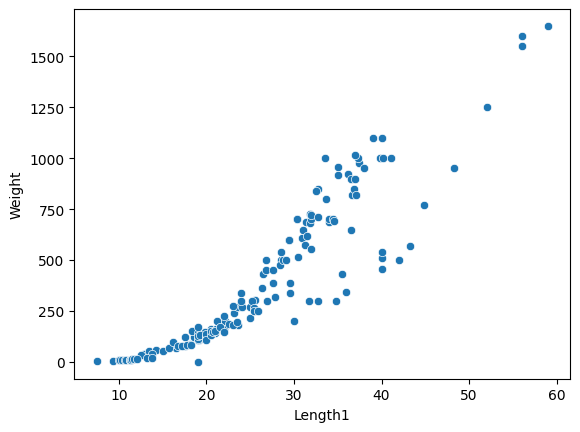

In [15]:
sns.scatterplot(data=df, x='Length1', y='Weight')
plt.show()

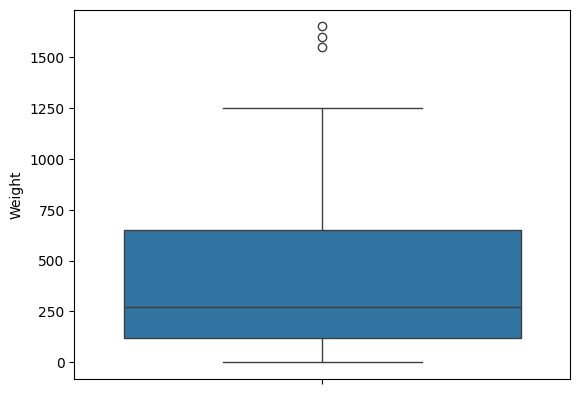

In [16]:
sns.boxplot(data=df['Weight'])
plt.show()

In [17]:
def iqr_outlier(col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return LL,UL

In [18]:
l,u= iqr_outlier("Weight")
print(l,u)

-675.0 1445.0


In [19]:
df = df[df['Weight'].between(l,u)]

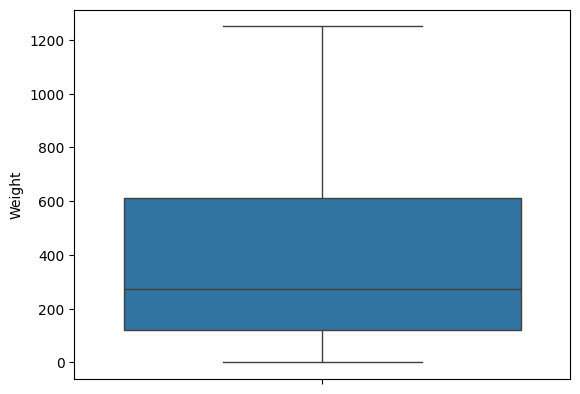

In [20]:
sns.boxplot(data=df['Weight'])
plt.show()

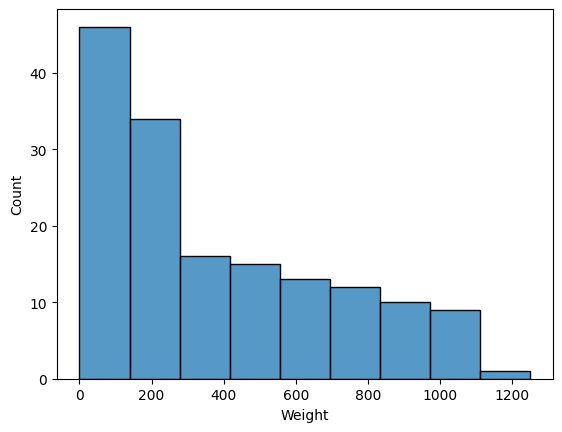

In [22]:
sns.histplot(df['Weight'])
plt.show()

In [24]:
df['Log_Weight'] = np.log(df['Weight'])

c:\Python313\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\bbuser\AppData\Local\Temp\ipykernel_13832\1063264878.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Log_Weight'] = np.log(df['Weight'])


In [28]:
df['Length_Height_Interaction'] = df['Length1'] * df['Height']

C:\Users\bbuser\AppData\Local\Temp\ipykernel_13832\3009762167.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Length_Height_Interaction'] = df['Length1'] * df['Height']


## Task 3: Model Development and Comparison

In [44]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_predictions = lr.predict(X_test)

lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
lr_r2 = r2_score(y_test, lr_predictions)

print("Linear Regression RMSE:", round(lr_rmse, 2))
print("Linear Regression R2 Score:", round(lr_r2, 2))

Linear Regression RMSE: 83.71
Linear Regression R2 Score: 0.95


In [45]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_predictions = ridge_model.predict(X_test)

ridge_rmse = np.sqrt(mean_squared_error(y_test, ridge_predictions))
ridge_r2 = r2_score(y_test, ridge_predictions)

print("Ridge Regression RMSE:", round(ridge_rmse, 2))
print("Ridge Regression R2 Score:", round(ridge_r2, 2))

Ridge Regression RMSE: 86.35
Ridge Regression R2 Score: 0.95


In [47]:
lasso_model = Lasso(alpha=1.0)
lasso_model.fit(X_train, y_train)
lasso_predictions = lasso_model.predict(X_test)

lasso_rmse = np.sqrt(mean_squared_error(y_test, lasso_predictions))
lasso_r2 = r2_score(y_test, lasso_predictions)

print("Lasso Regression RMSE:", round(lasso_rmse, 2))
print("Lasso Regression R2 Score:", round(lasso_r2, 2))

Lasso Regression RMSE: 87.18
Lasso Regression R2 Score: 0.95


c:\Python313\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e+04, tolerance: 1.561e+03
  model = cd_fast.enet_coordinate_descent(


In [48]:
polynomial_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
polynomial_model.fit(X_train, y_train)
polynomial_predictions = polynomial_model.predict(X_test)

poly_rmse = np.sqrt(mean_squared_error(y_test, polynomial_predictions))
poly_r2 = r2_score(y_test, polynomial_predictions)

print("Polynomial Regression RMSE:", round(poly_rmse, 2))
print("Polynomial Regression R2 Score:", round(poly_r2, 2))

Polynomial Regression RMSE: 84.04
Polynomial Regression R2 Score: 0.95
